# 도미 데이터 준비

https://gist.github.com/rickiepark/b37d04a95a42ef6757e4a99214d61697

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

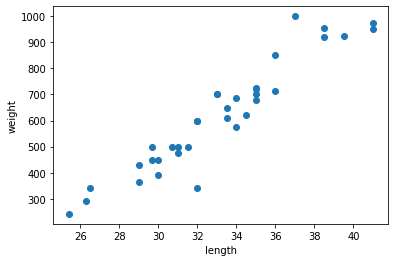

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 빙어 데이터 준비

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

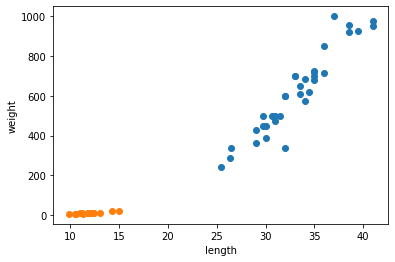

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# k-최근접 이웃 알고리즘

In [ ]:
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 2차원 리스트
fish_data = [[l,w] for l,w in zip(length, weight)]
fish_data

In [ ]:
fish_target = [1] * 35 + [0]*14     # smelt:0, bream: 1
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
kn.fit(fish_data, fish_target)
kn.score(fish_data,fish_target)

1.0

In [ ]:
kn.predict([[30,600]])

array([1])

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# 참고 데이터를 49개로 한 kn49 모델
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


(p.62) k-최근접 이웃 알고리즘은은 가장 간단한 머신러닝 알고리즘 중 하나입니다. 사실 어떤 규칙을 찾기보다는 전체 데이터를 메모리에 가지고 있는 것이 전부입니다.

연습문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):

  # k-최근접 이웃 개수 설정
  kn.n_neighbors = n
  
  # 점수 계산
  score = kn.score(fish_data, fish_target)
  
  # 100% 정확도에 미치지 못하는 이웃 개수 출력
  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


# 데이터 다루기

In [ ]:
print(fish_data[4])

[29.0, 430.0]


In [ ]:
print(fish_data[:5])
print(fish_data[44:])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [ ]:
# fit, score
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

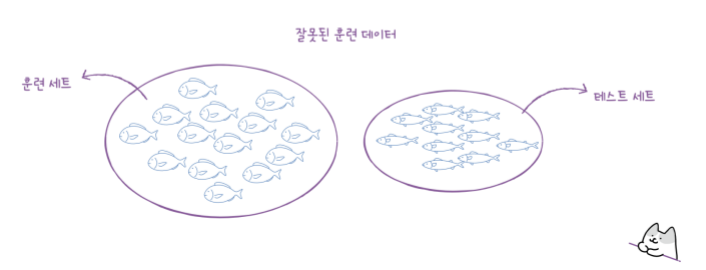

샘플링 편향.

train, test 나누기 전 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 train set, test set 구성

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)
print(input_arr.shape)

위에서 만든 배열에서 랜덤하게 샘플을 선택해 train set, test set 생성. 배열을 섞은 후에 나누는 방식 대신 무작위로 샘플을 고르는 방식.

In [ ]:
np.random.seed(49)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[14 27 24 16 17 41  0 19 31  2 21 10 30 22 38 23 11 34 20  1 13  7 43 25
 46  4  9 29  3  8 39 28 15 37 33  6 26 35 48 32 47 36 18 44  5 12 40 45
 42]


넘파이는 배열 인덱싱을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

In [ ]:
# 훈련 데이터 선택
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
print(input_arr[14], train_input[0] )

[ 32. 600.] [ 32. 600.]


In [ ]:
# 테스트 데이터 선택
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

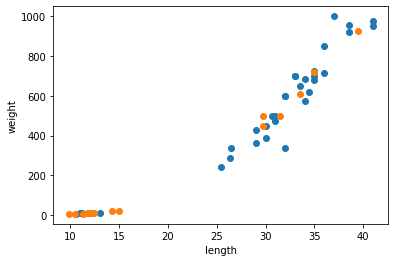

In [ ]:
# import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn_2 = KNeighborsClassifier()   # 이전에 생성한 kn 모델과 다름.

kn_2 = kn_2.fit(train_input, train_target)
kn_2.score(test_input, test_target)

1.0

In [ ]:
kn_2.predict(test_input)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
test_target

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

# 데이터 전처리

In [ ]:
# fish_data 의 구성 방식 변경 

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [ ]:
# import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.ones(), np.zeros()

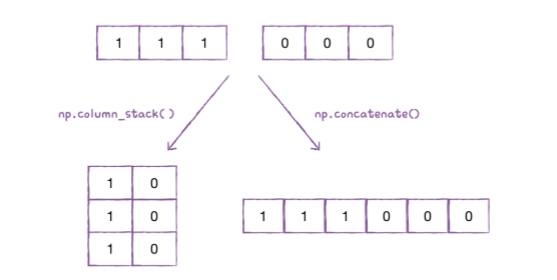

np.concatenate() 함수는 첫 번째 차원의 배열을 따라 배열을 연결한다.

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)
print(fish_target.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(49,)


데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는게 좋다.


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

넘파이 배열의 인덱스를 직접 섞어서 훈련 세트, 테스트 세트를 나누는 것이 아닌 사이킷런 train_test_split() 함수 사용.

전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눠주며 나누기 전에 shuffle이 된다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)

train_test_split() 함수는 기본적으로 25%를 테스트 세트로 떼어 낸다.

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


넘파이 배열의 크기는 파이썬의 튜플로 표현된다. 튜플의 원소가 하나면 원소 뒤에 콤마를 추가한다. 위 예제에서 타깃 데이터는 1차원 배열이므로 원소가 하나인 튜플로 표현된다.

In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다. 특히 일부 클래스의 개수가 적을 때 이런 일이 생길 수 있다. 훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없을 것이다.

train_test_split() 함수는 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠준다. 

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

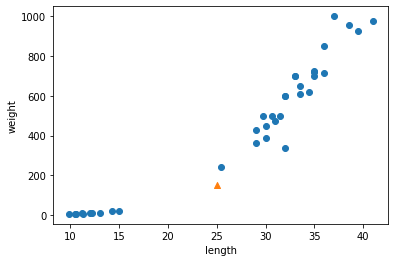

In [ ]:
# import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')    # marker '^'는 삼각형 모양 지정.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 삼각형으로 표시된 샘플은 분명히 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가깝다. 왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한 걸까?



In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

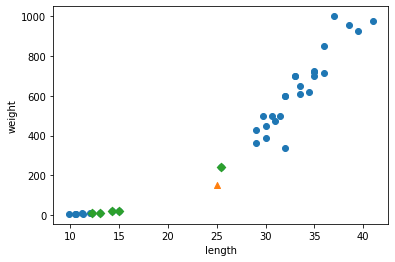

In [ ]:
# import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')    # marker '^'는 삼각형 모양 지정.
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가까운 5개의 샘플 중 빙어의 개수가 훨씬 많다.

In [ ]:
print(train_input[indexes])   # 구체적인 샘플 값 확인
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)    # 샘플들과의 거리

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 다시 맞춰라

가장 가까운 상위 2개의 

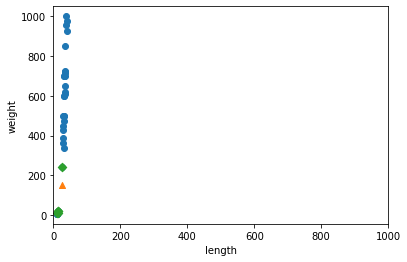

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')    # marker '^'는 삼각형 모양 지정.
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 알고리즘이 거리 기반일 때 특히 그렇다. 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다. 

가장 널리 사용하는 전처리 방법 중 하나는 표준점수(standard score) 이다. 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

In [ ]:
mean = np.mean(train_input, axis=0) # 행 기준 열 값 계산
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 표준점수로 변환
train_scaled = (train_input - mean) / std

위의 식은 넘파이 기능 '브로드캐스팅'을 사용.

## 전처리 데이터로 모델 훈련하기

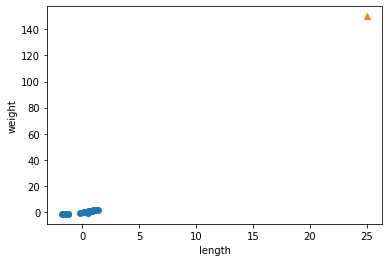

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')    # marker '^'는 삼각형 모양 지정.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

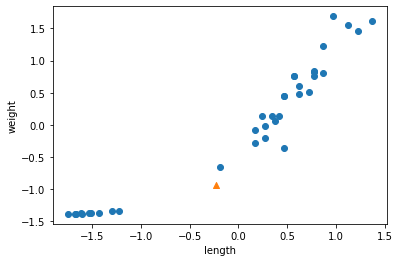

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')    # marker '^'는 삼각형 모양 지정.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
# test data 스케일 변환
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


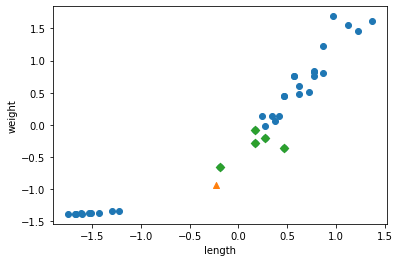

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')    # marker '^'는 삼각형 모양 지정.
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가장 가까운 상위 5개의 샘플 모두 '도미' 클래스에 속함을 확인할 수 있다.